In [65]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [49]:
df=pd.read_csv('./dentaldata.csv')
df.head()

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Where is the pain being felt?
0,31/10/2023 08:55:03,M30,Pain,aching,Mild,lingering pain,No,No,No,No,...,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No,NaN
1,31/10/2023 09:11:12,F21,Pain,aching,Mild,The pain came suddenly,Eating,No,No,No,...,No,No,No,No,No,Food impaction,No,No,No,NaN
2,31/10/2023 09:28:50,M20,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,...,No,No,No,No,No,Pulpitis with swelling,No,No,No,NaN
3,31/10/2023 09:29:47,F34,Pain,throbbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,...,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No,NaN
4,31/10/2023 09:36:48,F5,Swelling,No,No,No,No,No,Slow,No,...,No,No,No,No,No,Periodontal abcess,No,No,No,NaN


In [50]:
df=df.drop(['Timestamp','Where is the pain being felt?'],axis=1)
df.head()

,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
0,M30,Pain,aching,Mild,lingering pain,No,No,No,No,No,No,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No
1,F21,Pain,aching,Mild,The pain came suddenly,Eating,No,No,No,No,No,No,No,No,No,No,Food impaction,No,No,No
2,M20,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,No,No,No,No,No,No,No,Pulpitis with swelling,No,No,No
3,F34,Pain,throbbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,No,No,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No
4,F5,Swelling,No,No,No,No,No,Slow,No,No,No,No,No,No,No,No,Periodontal abcess,No,No,No


In [51]:
df.isna().sum()

Patient Number                                                                         0
Chief complaint                                                                        0
Nature of Pain                                                                        70
Severity of pain                                                                      76
Onset  and mode of pain                                                               86
Factors which worsens the pain                                                        85
Is the swelling painful?                                                             501
Has the swelling changed since it was first noticed? If yes how quickly?             500
Does the swelling changes during normal activities such as eating, speaking, etc?    502
Is the ulcer painful                                                                 427
Is there bleeding from the ulcer                                                     428
Is there discharge fr

In [52]:
df=df.fillna("No")
df.isna().sum()

Patient Number                                                                       0
Chief complaint                                                                      0
Nature of Pain                                                                       0
Severity of pain                                                                     0
Onset  and mode of pain                                                              0
Factors which worsens the pain                                                       0
Is the swelling painful?                                                             0
Has the swelling changed since it was first noticed? If yes how quickly?             0
Does the swelling changes during normal activities such as eating, speaking, etc?    0
Is the ulcer painful                                                                 0
Is there bleeding from the ulcer                                                     0
Is there discharge from the ulcer?         

In [53]:
df['Gender']=(df['Patient Number'].apply(lambda x: x[0]))
df['Age']=(df['Patient Number'].apply(lambda x: x[1:]))
df=df.drop(["Patient Number"],axis=1)

In [54]:
df.head()

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,...,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Gender,Age
0,Pain,aching,Mild,lingering pain,No,No,No,No,No,No,...,No,No,No,No,Acute Irreversible Pulpitis,No,No,No,M,30
1,Pain,aching,Mild,The pain came suddenly,Eating,No,No,No,No,No,...,No,No,No,No,Food impaction,No,No,No,F,21
2,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,No,No,...,No,No,No,No,Pulpitis with swelling,No,No,No,M,20
3,Pain,throbbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,No,No,...,No,No,No,No,Acute Irreversible Pulpitis,No,No,No,F,34
4,Swelling,No,No,No,No,No,Slow,No,No,No,...,No,No,No,No,Periodontal abcess,No,No,No,F,5


In [55]:
age_group_dict = {
    '0-2': 'Baby',
    '3-12': 'Child',
    '13-19': 'Teenager',
    '20-39': 'Young Adult',
    '40-59': 'Adult',
    '60-100': 'Old'
}

df['AgeGroup'] = df['Age'].apply(lambda x: next((label for age_range, label in age_group_dict.items() if int(age_range.split('-')[0]) <= int(x) <= int(age_range.split('-')[1])), None))

In [73]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(dtype=float)
df=pd.DataFrame(encoder.fit_transform(df),columns=df.columns)
df.head()

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,...,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Gender,Age,AgeGroup
0,1.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,22.0,5.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,3.0,0.0,12.0,5.0
2,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.0,0.0,0.0,3.0,1.0,11.0,5.0
3,1.0,4.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,26.0,5.0
4,2.0,0.0,3.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.0,0.0,0.0,3.0,0.0,43.0,2.0


/home/the_architect/.local/lib/python3.10/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

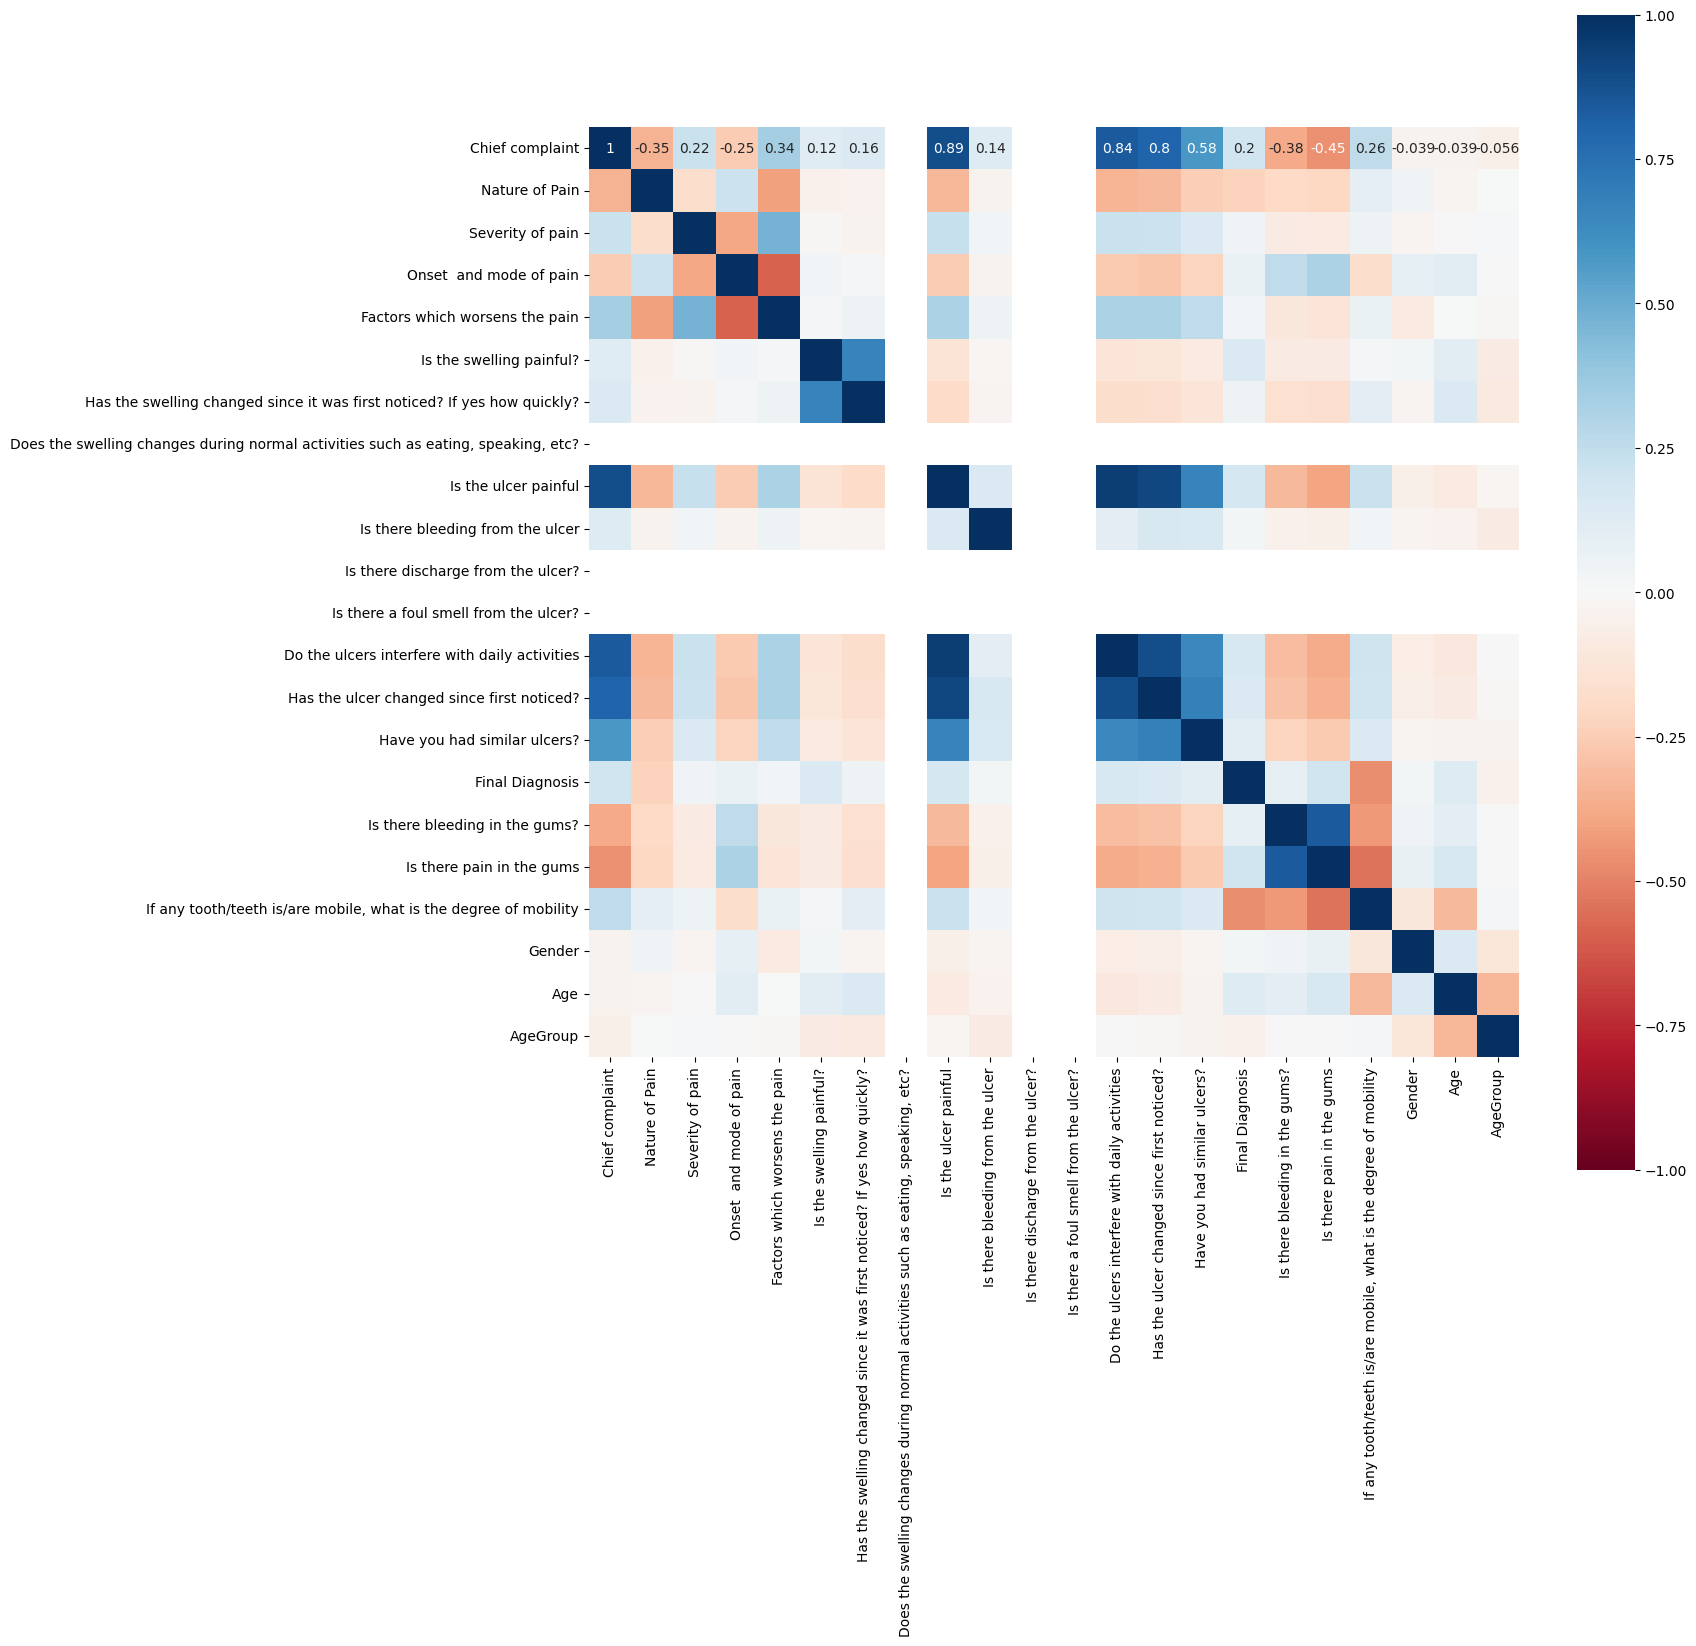

In [74]:
_,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap='RdBu',vmin=-1,vmax=1,annot=True,square=True,ax=ax)